<a href="https://colab.research.google.com/github/mauliksavalia/CS682/blob/main/CS682_Battery_Recharging_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50
25/25 [==============================] - 2s 24ms/step - loss: 0.2152 - val_loss: 0.1548
Epoch 2/50
25/25 [==============================] - 0s 5ms/step - loss: 0.1256 - val_loss: 0.0844
Epoch 3/50
25/25 [==============================] - 0s 5ms/step - loss: 0.0684 - val_loss: 0.0457
Epoch 4/50
25/25 [==============================] - 0s 5ms/step - loss: 0.0403 - val_loss: 0.0333
Epoch 5/50
25/25 [==============================] - 0s 5ms/step - loss: 0.0314 - val_loss: 0.0281
Epoch 6/50
25/25 [==============================] - 0s 5ms/step - loss: 0.0262 - val_loss: 0.0233
Epoch 7/50
25/25 [==============================] - 0s 5ms/step - loss: 0.0214 - val_loss: 0.0186
Epoch 8/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0168 - val_loss: 0.0144
Epoch 9/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0128 - val_loss: 0.0107
Epoch 10/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0093 - val_loss: 0.0077
Epoch 11/50
25/25 

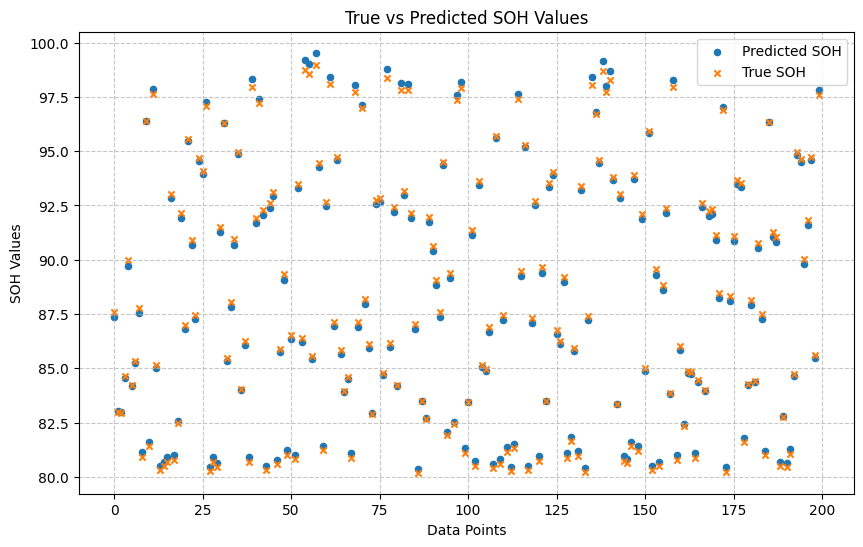

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load data from CSV file
file_path = '/content/synthetic_data_5.csv'  # Replace with the actual path to your CSV file
battery_data = pd.read_csv(file_path)

# Define input features (X) and target variable (y)
X = battery_data[['Capacity (Ah)' ]]
y = battery_data['SOH']

# Normalize the data using Min-Max scaling
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape the data for LSTM input (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='linear'))  # Output layer with linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values to the original scale
predictions_inv = scaler_y.inverse_transform(predictions)
y_test_inv = scaler_y.inverse_transform(y_test)

# Plot the results
# plt.plot(y_test_inv, label='True Health')
# plt.plot(predictions_inv, label='Predicted Health')

# plt.legend()
# plt.show()

plt.figure(figsize=(10, 6))  # Increase the figure size
plt.scatter(range(len(predictions_inv)), predictions_inv, label='Predicted SOH', marker='o', s=20)
plt.scatter(range(len(y_test_inv)), y_test_inv, label='True SOH', marker='x', s=20)
plt.xlabel('Data Points')
plt.ylabel('SOH Values')
plt.title('True vs Predicted SOH Values')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

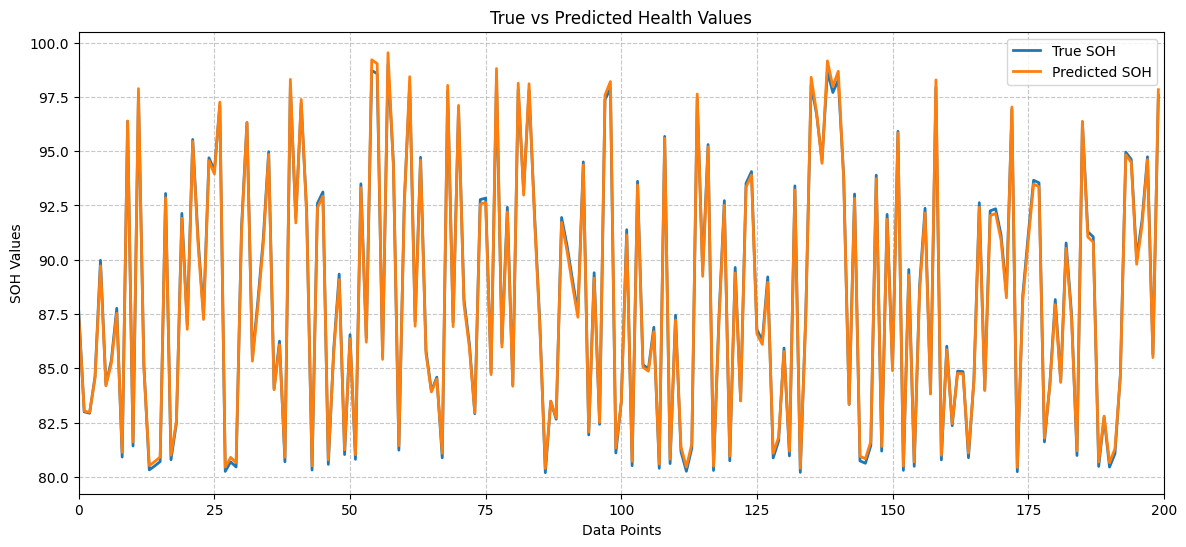

In [ ]:
# Plot the results with a line plot
plt.figure(figsize=(14, 6))  # Increase the figure size
plt.plot(y_test_inv, label='True SOH', linestyle='-', linewidth=2)
plt.plot(predictions_inv, label='Predicted SOH', linestyle='-', linewidth=2)

plt.xlabel('Data Points')
plt.ylabel('SOH Values')
plt.title('True vs Predicted Health Values')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust x-axis limits for better visualization
plt.xlim(0, len(predictions_inv))

plt.show()

In [ ]:
# Plot the results with a line plot
plt.figure(figsize=(14, 6))  # Increase the figure size
plt.plot(y_test_inv, label='True SOH', linestyle='-', linewidth=2)
plt.plot(predictions_inv, label='Predicted SOH', linestyle='-', linewidth=2)

plt.xlabel('Data Points')
plt.ylabel('SOH Values')
plt.title('True vs Predicted Health Values')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust x-axis limits for better visualization
plt.xlim(0, len(predictions_inv))

plt.show()